## Observations and Insights 

CONCLUSIONS

  1. ONLY 2 DRUGS SEEM TO WORK - AT FIRST GLANCE

    Figuring that all mice started treatment with tumor sizes of 45, 
    then only 2 drugs finished the study with average tumor size less than 45: Capomuline and Ramicane. 
    I checked all 10.  

  
  2. VERY STRONG CORRELATION COEFFICIENT OF .88 BETWEEN MOUSE WEIGHT AND FINAL TUMOR VOLUME

    This is an interesting phenomenon. All mice started the study with tumor volume at 45. 
    Why would the weight of the mouse have such an influence on final tumor volume?


  3. WE NEED TO ANALYZE DATA AGAIN AND CONTROL FOR MOUSE WEIGHT

    My hypothesis would be that the two drugs that seemed to be successful happened to have a 
    disproportionate number of light mice in their subset. 

    I was also curious if mice weight changed over the time periods. I ran a check, and the mice did not seem 
    to change weight during the study.  

    However, I also added an "Average Mouse Weight" column to the summary dataframe below.  The average weight for the 
    successful drugs was 20 grams, versus 27 grams for the unsuccessful drugs. Therefore, I would hypothesize 
    that a very large percentage of success count be attibuted to testing on lighter mice. Again, this is assuming
    that mouse weight did not change during the duration of the study. I would recommend futher analysis that controls
    for mouse weight, and evaluate the results.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

pd.options.display.float_format = '{:,.2f}'.format # Set formatting

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates_df = merge_df[merge_df.duplicated(["Mouse ID", "Timepoint"])]  # Find rows with same Mouse ID and Timepoint

duplicated_ids_df = pd.DataFrame({"Duplicated Mouse IDs":                 # Single out the Mouse IDs only
                                  duplicates_df["Mouse ID"].unique()  })  

duplicated_ids_df

,Duplicated Mouse IDs
0,g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merge_df = merge_df[~merge_df["Mouse ID"].isin(duplicated_ids_df["Duplicated Mouse IDs"])] 

clean_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_merge_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_regimen_groupby = clean_merge_df.groupby('Drug Regimen')  # Create the groupby

tumor_vol_df = pd.DataFrame({"Mean" : drug_regimen_groupby["Tumor Volume (mm3)"].mean(), # Assemble the dataframe
                             
                             "Median" : drug_regimen_groupby["Tumor Volume (mm3)"].median(),
                             
                             "Variance" : drug_regimen_groupby["Tumor Volume (mm3)"].var(),
                             
                             "Standard Dev" : drug_regimen_groupby["Tumor Volume (mm3)"].std(),
                             
                             "SEM" : drug_regimen_groupby["Tumor Volume (mm3)"].sem(),
                            
                             "Total Number of Measurements" :  # OPTIONAL Total number of measurements isn't asked 
                             drug_regimen_groupby["Tumor Volume (mm3)"].count() # for here, but I've included it 
                            })                                                  # to get ready for another exercise
tumor_vol_df                                                                    # below. 


,Mean,Median,Variance,Standard Dev,SEM,Total Number of Measurements
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,230
Ceftamin,52.59,51.78,39.29,6.27,0.47,178
Infubinol,52.88,51.82,43.13,6.57,0.49,178
Ketapril,55.24,53.70,68.55,8.28,0.60,188
Naftisol,54.33,52.51,66.17,8.13,0.60,186
Placebo,54.03,52.29,61.17,7.82,0.58,181
Propriva,52.32,50.45,43.85,6.62,0.54,148
Ramicane,40.22,40.67,23.49,4.85,0.32,228
Stelasyn,54.23,52.43,59.45,7.71,0.57,181


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

alternate_display = drug_regimen_groupby.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem" ]})

alternate_display

Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

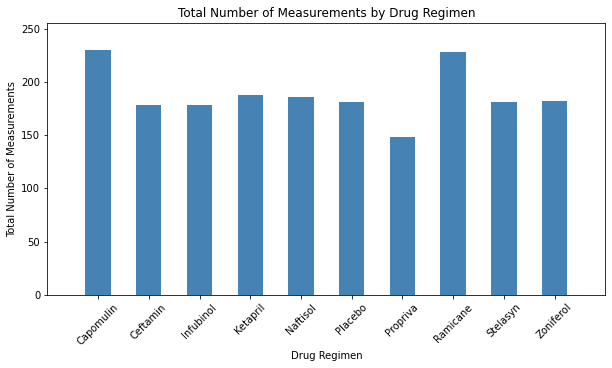

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_bar = tumor_vol_df.plot.bar(y="Total Number of Measurements", # Pulling data from a previous exercise
           rot=45, color='steelblue', figsize=(10,5), legend=False)        # Some formatting configurations
    
drug_regimen_bar.set_title("Total Number of Measurements by Drug Regimen") # Add chart title

drug_regimen_bar.set_xlabel("Drug Regimen")                                # Axis labels
drug_regimen_bar.set_ylabel("Total Number of Measurements")
 
plt.xlim(-1, len(tumor_vol_df.index))                                      # Add some white space to 
plt.ylim(0, max(tumor_vol_df["Total Number of Measurements"])+25)          # the margins inside the chart

plt.show()

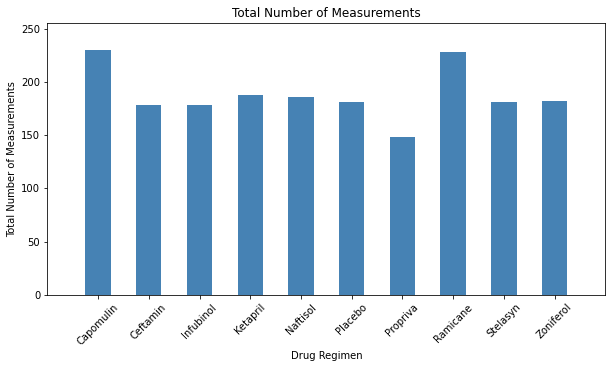

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot

plt.figure(figsize=(10, 5))

plt.bar(tumor_vol_df.index, tumor_vol_df["Total Number of Measurements"],     # Pulling data from a previous exercise
                            color='steelblue', align="center", width=0.5)     # Some formatting

tick_locations = [value for value in tumor_vol_df.index]                      # Tick locations with list comprehension

plt.xticks(tick_locations, tumor_vol_df.index, rotation=45)

plt.title("Total Number of Measurements")                                     # Add chart title

plt.xlabel("Drug Regimen")                                                    # Axis labels
plt.ylabel("Total Number of Measurements")

plt.xlim(-1, len(tumor_vol_df.index))                                      # Add some white space to 
plt.ylim(0, max(tumor_vol_df["Total Number of Measurements"])+25)          # the margins inside the chart

plt.show()

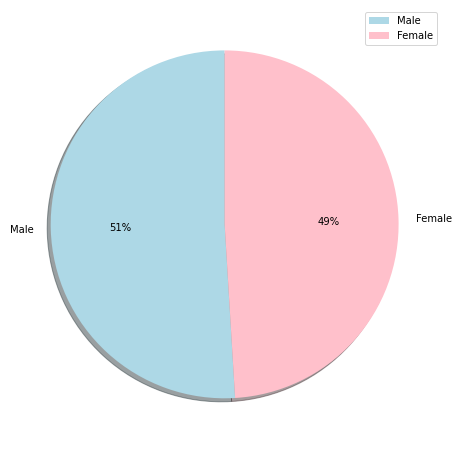

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_df = pd.DataFrame({"Mouse Gender" : clean_merge_df["Sex"].value_counts()}) # Get male and female counts

colors = ["lightblue", "pink"]   # Forgive me for the stereotypical gender colores. 


mouse_gender_pie = mouse_gender_df.plot.pie(y="Mouse Gender", shadow=True,     # The plot, with some formatting. 
                                            figsize=(8,8), ylabel='', autopct = "%.0f%%", 
                                            colors=colors, startangle=90)


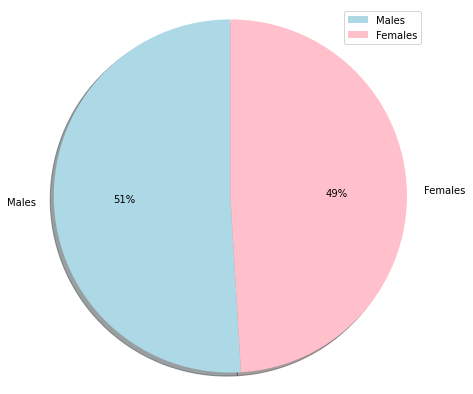

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Males", "Females"]   # Set labels     

gender_counts = clean_merge_df["Sex"].value_counts()    # Get gender counts

colors = ["lightblue", "pink"]   # Set colors

plt.figure(figsize=(7, 7))       # Make size a little larger than the default

plt.pie(gender_counts, labels=labels, colors=colors,  # Plot it, with some additional formatting
        autopct="%1.0f%%", shadow=True, startangle=90)

plt.axis("equal")

plt.legend()   # Added legend so that it's identical to Panda version above

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

temp_df = clean_merge_df.groupby(['Mouse ID'])["Timepoint"].max()

mouse_final_vol = pd.merge(temp_df, clean_merge_df, on=['Mouse ID', "Timepoint"] )
mouse_final_vol

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.71,0
244,z578,45,Ramicane,Male,11,16,30.64,0
245,z581,45,Infubinol,Female,24,25,62.75,3
246,z795,45,Naftisol,Female,13,29,65.74,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

drug_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#drug_regimens = mouse_final_vol["Drug Regimen"].unique()                 # Rather than the list above, I can plot all
                                                                          # ten drugs by activating this alternative list
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []    # This list will come in handy for plotting later

lower_quartiles = []   # These lists are to capture data in the for-loop
upper_quartiles = []   # below, which will allow me to present all these 
means=[]               # calculations in a nice dataframe. 
medians = []
iqrs = []
lower_bounds = []
upper_bounds = []
outliers_all = []
ave_weights = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in drug_regimens:         # I use a for-loop to go through the 4 drugs
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
       
    regimen_specific_rows = mouse_final_vol.loc[mouse_final_vol["Drug Regimen"] == regimen]

    # add subset for the boxplots farther down
    
    tumor_volumes = regimen_specific_rows["Tumor Volume (mm3)"]  # tumor_volumes will be a useful variable below

    tumor_vol_data.append(tumor_volumes)   # Subset added for plotting later

    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_volumes.quantile([.25,.5,.75])      # This whole next segment is to get the lower
                                                          # and upper bounds below. I'm appending these 
    lowerq = quartiles[0.25]                              # calculations to lists so that they can be 
    lower_quartiles.append(lowerq)                        # presented in a dataframe below. 
    
    upperq = quartiles[0.75]
    upper_quartiles.append(upperq)
    
    mean=tumor_volumes.mean()
    means.append(mean)
    
    median = quartiles[0.5]
    medians.append(median)
    
    iqr = upperq-lowerq
    iqrs.append(iqr)

    lower_bound = lowerq - (1.5*iqr)
    lower_bounds.append(lower_bound)
    
    upper_bound = upperq + (1.5*iqr)
    upper_bounds.append(upper_bound)


    outliers = []                                         # The critical section to identify outliers
    
    for row in tumor_volumes:
        if row > upper_bound or row < lower_bound:
            outliers.append(round(row ,2))                # Appends outlier to list to present in dataframe 
    outliers_all.append(outliers)                         # below
    
    weights = regimen_specific_rows["Weight (g)"]         # OPTIONAL This next section was me testing a 
                                                          # hypothesis that drugs that look successful at first
    ave_weight = weights.mean()                           # glance, may have had a disproportionate number of
    ave_weights.append(ave_weight)                        # light mice. So I calculated average weight of mice here.
    
promising_regimens_df = pd.DataFrame({"Drug Regimen" : drug_regimens,     # Built a dataframe to present all the 
                                                                          # statistical calculations
                                 "Lower Quartile" : lower_quartiles,

                                 "Upper Quartile" : upper_quartiles,

                                 "Interquartile Range" : iqrs,
                                      
                                 "Mean Volume" : means,

                                 "Median Volume" : medians,

                                 "Lower Bound" : lower_bounds,

                                  "Upper Bound" : upper_bounds,

                                  "Outliers" : outliers_all,               # This is the most important column, 
                                                                           # with the outliers
                                  "Average Mouse Weight" : ave_weights     # Optional, for my own curiosity
                                 })
promising_regimens_df    

,Drug Regimen,Lower Quartile,Upper Quartile,Interquartile Range,Mean Volume,Median Volume,Lower Bound,Upper Bound,Outliers,Average Mouse Weight
0,Capomulin,32.38,40.16,7.78,36.67,38.13,20.70,51.83,[],20.12
1,Ramicane,31.56,40.66,9.10,36.19,36.56,17.91,54.31,[],20.00
2,Infubinol,54.05,65.53,11.48,58.18,60.17,36.83,82.74,[36.32],27.32
3,Ceftamin,48.72,64.30,15.58,57.75,59.85,25.36,87.67,[],27.40


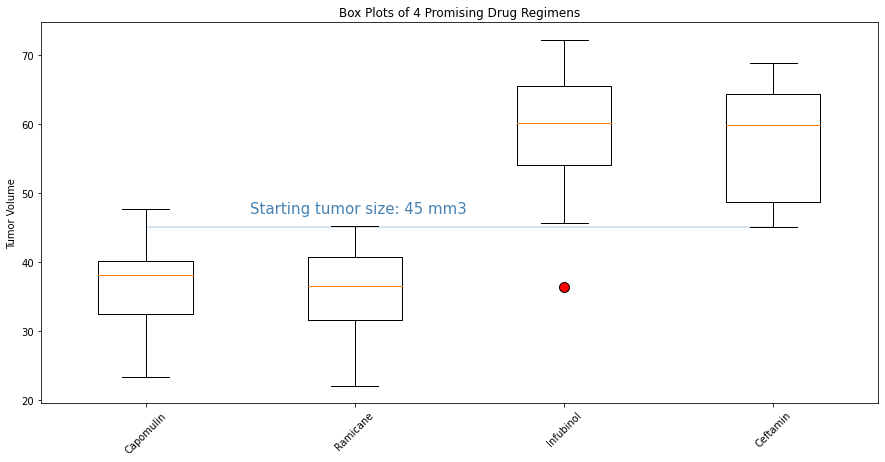

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

x_axis = drug_regimens                                            # Creates the x axis pulling from the list of 
                                                                  # drug regimens above

fig1, ax1 = plt.subplots(figsize=(15, 7))                         # This sets up the figure with multiple plots

ax1.set_title('Box Plots of 4 Promising Drug Regimens')           # Title

flierprops = dict(marker='o', markerfacecolor='r', markersize=10, # All this just to get the outlier dot to be red
                  linestyle='none')

ax1.boxplot(tumor_vol_data, flierprops=flierprops)                # The critical line, which plots a list of lists
                                                                  # that was created in the previous section

ax1.set_ylabel("Tumor Volume")                                    # Add Y label

plt.xticks([x for x in range(1, len(drug_regimens)+1)],           # List comprehension to set up x ticks. As a result,
           drug_regimens, rotation=45)                            # if I change the list of drugs, the ticks change too

plt.hlines(45, 1, len(drug_regimens), alpha=0.25)                 # All mice started at 45mm3. I added this blue line
                                                                  # so that it would be easy to see which drugs seemed

plt.annotate('Starting tumor size: 45 mm3',                       # Add text to explain the blue line
             (1.5,47),fontsize=15, color="steelblue")

plt.show()

## Line and Scatter Plots

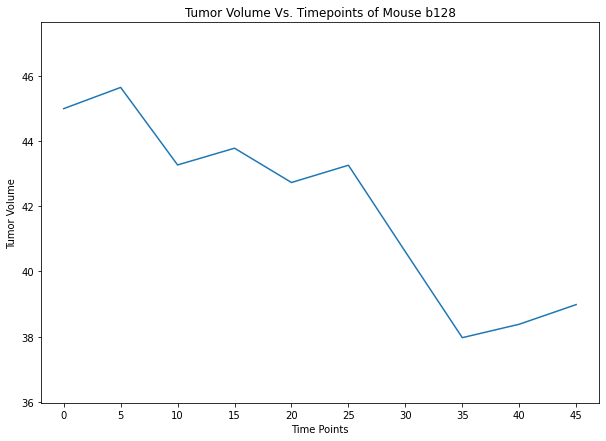

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'b128'                                      # Picked a mouse
 
mouse_data = clean_merge_df.loc[clean_merge_df         # Filter initial dataframe for just this mouse
            ["Mouse ID"] == mouse_id]                          
   
volumes = mouse_data['Tumor Volume (mm3)']             # List of tumor volumes for Y axis

timepoints = mouse_data['Timepoint']                   # List of timepoints for X axis

plt.figure(figsize=(10, 7))                            # Make figure larger than default

plt.xlim(-2, timepoints.max()+2)                       # Give chart some white space at margins
plt.ylim(volumes.min()-2, volumes.max()+2)

plt.title(f"Tumor Volume Vs. Timepoints of Mouse {mouse_id}")   # Title and axis lables
plt.xlabel("Time Points")
plt.ylabel("Tumor Volume")

plt.xticks(timepoints, rotation=0 )                    # Setting up ticks on x axis

plt.plot(timepoints, volumes)                          # And finally: the actual plot

plt.show()

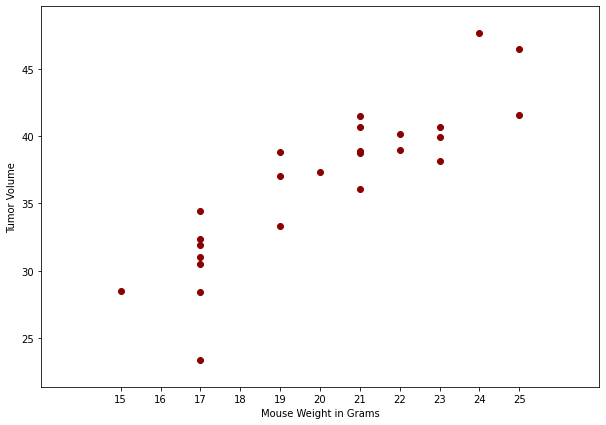

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

drug_regimen = 'Capomulin'                              # Set up variable to make it easier to change which drug
                                                        # regimen is being plotted, if desired

mouse_final_vol = mouse_final_vol.loc[mouse_final_vol   # Filter for that Drug
                                      ["Drug Regimen"] == drug_regimen]

ave_volume = mouse_final_vol['Tumor Volume (mm3)']      # Setting up list of values for Y axis 

mouse_weight = mouse_final_vol['Weight (g)']            # Setting up list values for X axis 

plt.figure(figsize=(10, 7))                             # Make figure larger than default

plt.xlim(mouse_weight.min()-2, mouse_weight.max()+2)    # Give chart some white space at margins
plt.ylim(ave_volume.min()-2, ave_volume.max()+2)

#plt.title(f"Tumor Volume Vs. Mouse Weight for {drug_regimen}") # Title and axis lables
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")

plt.xticks(range(mouse_weight.min(), 
                 mouse_weight.max()+1), rotation=0 )     # Setting up ticks on the x axis

plt.scatter(mouse_weight, ave_volume, marker="o",        # The plot, with some formatting
            facecolors="darkred", alpha=1)

plt.show()

## Correlation and Regression

Correlation coefficient between mouse weight and tumor volume: 0.88


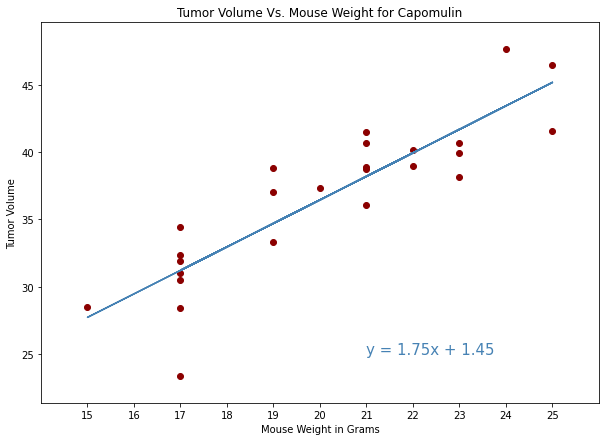

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Print the coefficient calculation: 
print(f"Correlation coefficient between mouse weight and tumor volume: {round(st.pearsonr(mouse_weight,ave_volume)[0],2)}")

# Create equation of line to calculate predicted violent crime rate

slope, intercept, rvalue, pvalue, stderr = stats.linregress(mouse_weight, ave_volume)  # Get elements of regression equation

regress_values = mouse_weight * slope + intercept       # Create regression equation


# Plot the linear model on top of scatter plot 

plt.figure(figsize=(10, 7))                             # Make figure larger than default

plt.xlim(mouse_weight.min()-1, mouse_weight.max()+1)    # Give chart some white space at margins
plt.ylim(ave_volume.min()-2, ave_volume.max()+2)

plt.title(f"Tumor Volume Vs. Mouse Weight for {drug_regimen}") # Title and axis lables
plt.xlabel("Mouse Weight in Grams")
plt.ylabel("Tumor Volume")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))   # Create a string to annotate the  
plt.annotate(line_eq,(21,25),fontsize=15, color="steelblue")                # regression equation on the chart

plt.scatter(mouse_weight, ave_volume, marker="o",                           # The scatter plot of mouse weight
            facecolors="darkred",  alpha=1)                  # versus tumor volume, with some formatting

plt.plot(mouse_weight, regress_values, color="steelblue")                   # Plotting the superimposed regression line

plt.xticks(range(mouse_weight.min(), mouse_weight.max()+1), rotation=0 )    # Setting up ticks on the x axis

plt.show()

In [ ]:
# 